<a href="https://colab.research.google.com/github/raz0208/Techniques-For-Text-Analysis/blob/main/LogisticRegression/LogisticRegression_SentimentClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A simple implementation of Logistic Regression for sentiment classification.

In [63]:
# Import required libiraries
import nltk
import random
import string
from nltk.corpus import movie_reviews
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Download the dataset (if not already downloaded)
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [51]:
# Load dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

In [29]:
#documents

In [61]:
# Preprocess dataset
def preprocess(text):
    return ' '.join([word.lower() for word in text if word not in string.punctuation])

In [64]:
# Prepare data
data = [preprocess(words) for words, label in documents]
labels = [label for words, label in documents]

In [31]:
#texts

In [32]:
#labels

In [65]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [66]:
# Create and train the logistic regression model with TF-IDF vectorization
model = make_pipeline(TfidfVectorizer(), LogisticRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [67]:
# Evaluate model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8250


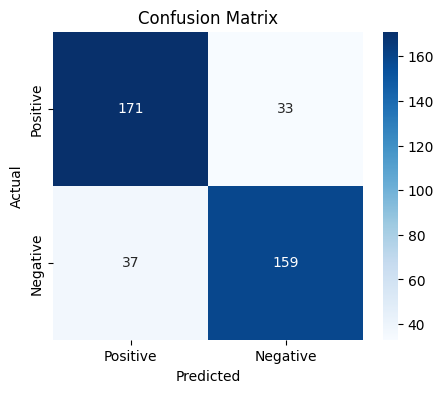

In [68]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, predictions, labels=['pos', 'neg'])
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [69]:
# Classify input text
input_text = "It's hokey . There are virtually no surprises , and the writing is second-rate .\nSo why was it so enjoyable ? For one thing , the cast is great . Another nice touch is the music . I was overcome with the urge to get off the couch and start dancing . It sucked me in , and it'll do the same to you ."
input_text = preprocess(input_text)
prediction = model.predict([input_text])[0]
print(f"Predicted Sentiment: {prediction}")

Predicted Sentiment: neg
